# Discrepancy model testing

## Alexandra Semposki

### Date: 31 August 2021

In [1]:
#import packages
import numpy as np
import math
import emcee
import corner
from cycler import cycler
from scipy import stats, special, integrate

import matplotlib.pyplot as plt
# plt.style.reload_library()
# plt.style.use('science')
%matplotlib inline

#import classes we'll need
from mixing import Switching, Mixing, Models
from discrepancy import Discrepancy
from priors import Priors

In [2]:
new = Discrepancy()

In [3]:
g = np.linspace(1e-6, 0.5, 100)
low = np.array([5])
high = np.array([5])

Which interval do you want to use: 68 or 95?68
Error will be on the order of g^6
0
1
2
3
4
5
RMS:  [ 2.50662827  0.         -3.75994241  0.          5.48324935  0.        ] 4.102291054638137
Error will be of the order g^6.
0
1
2
3
4
5
[ 1.81280495 -0.30635418  0.11330031 -0.05744141  0.03540635 -0.02513062]
RMS (d):  [ 1.81280495 -0.30635418  0.11330031 -0.05744141  0.03540635 -0.02513062] 0.06712233748405752


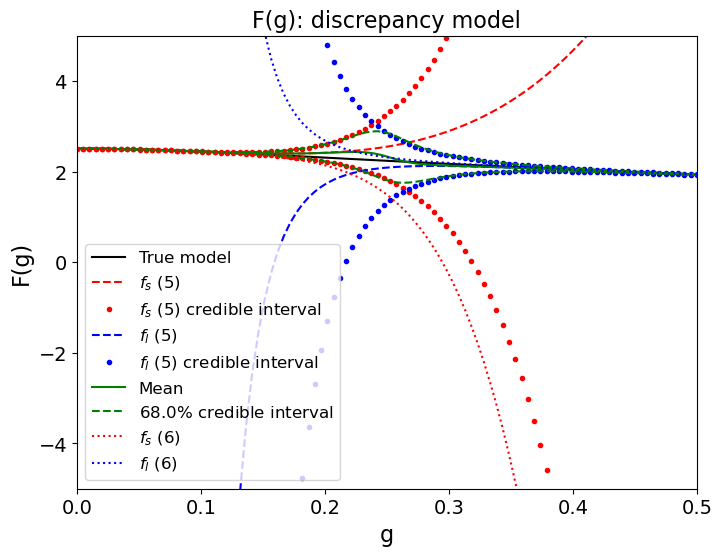

Would you like to save this figure? (yes/no)no


In [4]:
dist = new.fdagger(g, np.array([5]), np.array([5]), plot_fdagger=True, next_order=True, validation=False)

Which interval do you want to use: 68 or 95?68
Orders:  6 6
0
1
2
3
4
5
6
[ 2.50662827e+00  0.00000000e+00 -7.51988482e+00  0.00000000e+00
  1.31597984e+02  0.00000000e+00 -4.34273349e+03]
[1.88593341e-65 5.20673449e-21 2.13014670e-17 2.76269318e-15
 8.71990011e-14 1.26876174e-12 1.13115112e-11 7.19213017e-11
 3.57061049e-10 1.46743345e-09 5.19561350e-09 1.63057086e-08
 4.63227774e-08 1.21041209e-07 2.94539661e-07 6.74058437e-07
 1.46230489e-06 3.02678382e-06 6.00981408e-06 1.14982347e-05
 2.12787049e-05 3.82132805e-05 6.67809699e-05 1.13844629e-04
 1.89719313e-04 3.09638552e-04 4.95739486e-04 7.79717060e-04
 1.20633208e-03 1.83799872e-03 2.76072470e-03 4.09173276e-03
 5.98915613e-03 8.66427437e-03 1.23968402e-02 1.75541443e-02
 2.46145739e-02 3.41965447e-02 4.70938247e-02 6.43184236e-02
 8.71523981e-02 1.17210116e-01 1.56512743e-01 2.07576944e-01
 2.73520082e-01 3.58184464e-01 4.66283514e-01 6.03573132e-01
 7.77051843e-01 9.95193814e-01 1.26821924e+00 1.60840715e+00
 2.03045616e+00 2.

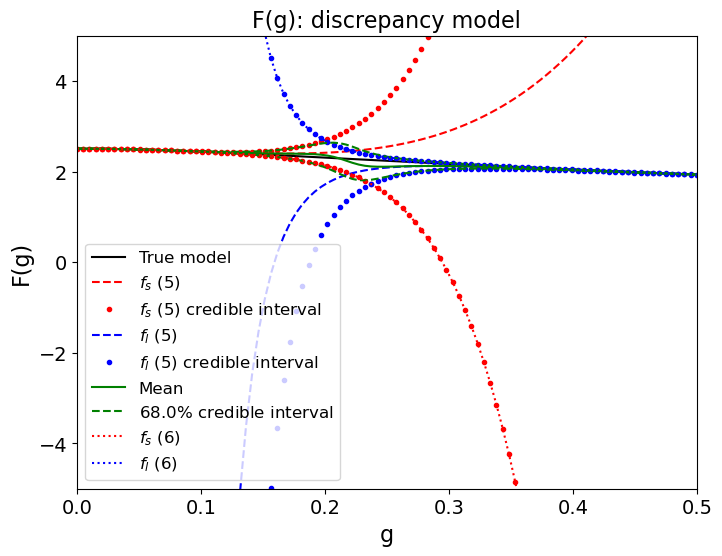

Would you like to save this figure? (yes/no)no


In [5]:
pdf = new.fdagger(g, np.array([5]), np.array([5]), plot_fdagger=True, next_order=True, validation=True)

Let's do some subtraction (how hard can that be?) to see if the orders match what we expect.

In [6]:
compare = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [7]:
sub_low = compare.low_g(g, np.array([6])) - compare.low_g(g, np.array([5]))
sub_high = compare.high_g(g, np.array([6])) - compare.high_g(g, np.array([5]))

print('Low: {}'.format(sub_low))
print('\nHigh: {}'.format(sub_high))

Low: [[ 0.00000000e+00 -7.21578353e-11 -4.61535121e-09 -5.25613277e-08
  -2.95294770e-07 -1.12639324e-06 -3.36325902e-06 -8.48064276e-06
  -1.88960591e-05 -3.83070940e-05 -7.20806042e-05 -1.27693808e-04
  -2.15227269e-04 -3.47909771e-04 -5.42715083e-04 -8.21010620e-04
  -1.20925799e-03 -1.73976545e-03 -2.45149221e-03 -3.39090470e-03
  -4.61288466e-03 -6.18168913e-03 -8.17196243e-03 -1.06697998e-02
  -1.37738634e-02 -1.75965494e-02 -2.22652080e-02 -2.79234142e-02
  -3.47322916e-02 -4.28718873e-02 -5.25425989e-02 -6.39666535e-02
  -7.73896384e-02 -9.30820840e-02 -1.11341098e-01 -1.32492054e-01
  -1.56890324e-01 -1.84923078e-01 -2.17011117e-01 -2.53610772e-01
  -2.95215850e-01 -3.42359630e-01 -3.95616914e-01 -4.55606128e-01
  -5.22991474e-01 -5.98485141e-01 -6.82849555e-01 -7.76899692e-01
  -8.81505441e-01 -9.97594013e-01 -1.12615241e+00 -1.26822993e+00
  -1.42494076e+00 -1.59746656e+00 -1.78705919e+00 -1.99504337e+00
  -2.22281951e+00 -2.47186649e+00 -2.74374459e+00 -3.04009839e+00
  -3.

In [8]:
v1, v2 = new.validation(g, low, high)

#calculate the 68% credibility intervals and print
sd1 = np.sqrt(v1)
sd2 = np.sqrt(v2)

print('Low: {}'.format(sd1))
print('\nHigh: {}'.format(sd2))

Orders:  [6] [6]
0
1
2
3
4
5
6
[ 2.50662827e+00  0.00000000e+00 -7.51988482e+00  0.00000000e+00
  1.31597984e+02  0.00000000e+00 -4.34273349e+03]
[1.88593341e-65 5.20673449e-21 2.13014670e-17 2.76269318e-15
 8.71990011e-14 1.26876174e-12 1.13115112e-11 7.19213017e-11
 3.57061049e-10 1.46743345e-09 5.19561350e-09 1.63057086e-08
 4.63227774e-08 1.21041209e-07 2.94539661e-07 6.74058437e-07
 1.46230489e-06 3.02678382e-06 6.00981408e-06 1.14982347e-05
 2.12787049e-05 3.82132805e-05 6.67809699e-05 1.13844629e-04
 1.89719313e-04 3.09638552e-04 4.95739486e-04 7.79717060e-04
 1.20633208e-03 1.83799872e-03 2.76072470e-03 4.09173276e-03
 5.98915613e-03 8.66427437e-03 1.23968402e-02 1.75541443e-02
 2.46145739e-02 3.41965447e-02 4.70938247e-02 6.43184236e-02
 8.71523981e-02 1.17210116e-01 1.56512743e-01 2.07576944e-01
 2.73520082e-01 3.58184464e-01 4.66283514e-01 6.03573132e-01
 7.77051843e-01 9.95193814e-01 1.26821924e+00 1.60840715e+00
 2.03045616e+00 2.55189942e+00 3.19358056e+00 3.98019806e+00


No, these are not the same.

Well, now the blue curves are the same!!!

In [9]:
new.low_g(g, 5.0)

array([[2.50662827, 2.50643647, 2.50586224, 2.50490866, 2.50358088,
        2.50188608, 2.49983352, 2.49743449, 2.49470235, 2.49165252,
        2.48830246, 2.48467169, 2.4807818 , 2.47665641, 2.47232121,
        2.46780395, 2.46313441, 2.45834446, 2.45346799, 2.44854097,
        2.44360142, 2.43868941, 2.43384706, 2.42911856, 2.42455014,
        2.42019009, 2.41608876, 2.41229855, 2.40887392, 2.40587137,
        2.40334948, 2.40136886, 2.39999219, 2.39928419, 2.39931167,
        2.40014344, 2.40185042, 2.40450556, 2.40818384, 2.41296235,
        2.41892018, 2.42613852, 2.43470058, 2.44469165, 2.45619906,
        2.4693122 , 2.48412252, 2.50072351, 2.51921074, 2.5396818 ,
        2.56223636, 2.58697615, 2.61400493, 2.64342854, 2.67535486,
        2.70989383, 2.74715744, 2.78725974, 2.83031684, 2.87644689,
        2.92577011, 2.97840876, 3.03448718, 3.09413173, 3.15747085,
        3.22463503, 3.29575682, 3.3709708 , 3.45041364, 3.53422404,
        3.62254277, 3.71551264, 3.81327852, 3.91

In [10]:
new.high_g(g, 5.0)

array([[-2.09420324e+29, -8.64939942e+08, -1.84831485e+07,
        -1.92305878e+06, -3.82744708e+05, -1.08729440e+05,
        -3.86937732e+04, -1.60897295e+04, -7.49897406e+03,
        -3.81353054e+03, -2.07745861e+03, -1.19643807e+03,
        -7.21341022e+02, -4.51867315e+02, -2.92356417e+02,
        -1.94419922e+02, -1.32353455e+02, -9.19138669e+01,
        -6.49129987e+01, -4.64887288e+01, -3.36698444e+01,
        -2.45934962e+01, -1.80645134e+01, -1.32999569e+01,
        -9.77713792e+00, -7.14103366e+00, -5.14665832e+00,
        -3.62247975e+00, -2.44677184e+00, -1.53207162e+00,
        -8.14804740e-01, -2.48261009e-01,  2.02225632e-01,
         5.62625673e-01,  8.52567548e-01,  1.08700986e+00,
         1.27744175e+00,  1.43275281e+00,  1.55986933e+00,
         1.66422358e+00,  1.75010281e+00,  1.82091070e+00,
         1.87936479e+00,  1.92764646e+00,  1.96751571e+00,
         2.00039952e+00,  2.02746028e+00,  2.04964910e+00,
         2.06774753e+00,  2.08240043e+00,  2.09414199e+0